# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

The online portal 'E-news Express' is looking to increase the number of subscribers. The company conducted a market experiment to test a new landing page designed by the design team to attract more subscribers. The market test is comparing the new features of new landing page to the old one, and their effects in number of subscribers increase.
In order to measure the potential clients’ response, the experiment is selecting a sample of 100 individuals randomly and dividing them into two different groups: the control group and the treatment.
The control group is using the old landing page, and the treatment group is being tested on the new landing page. We are given a dataset of 100 observations to analyze the outcome of the test for both landing pages.  The main pieces of information that we are given to complete the analysis are the time spent on each page, the language selected per user, the number of visitors of both landing pages that eventually subscribed to the news portal (they appear as converted), and the group of the experiment that each of them belong to, along with their user id.


## Import all the necessary libraries

In [303]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_ind# for question 2
from scipy.stats import norm
from scipy.stats import t
import statsmodels.stats.proportion
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import f_oneway


In [304]:
#to remove the warning messages
import warnings
warnings.filterwarnings('ignore')

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [305]:
# write the code for reading the dataset abtest.csv
df1=pd.read_csv(r'C:\Users\charo\Downloads\abtest.csv')


In [306]:
df=df1.copy()# make a copy of the dataset to avoid changing the data on the original dataframe.

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [307]:
df.head() # we chech the data has been loaded successfully


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


We have 6 variables included in the dataset:  variable 'user_id' that is the number assigned to each participant of the experiment; variable 'group' that divide the sample in two halves,  control group (old landing page users) and treatment group (new landing page users); variable 'landing_page' (new or old landing page visited by the individual); variable' time_spent_on_the_page', which it is the  time that each user is spending when visiting  her or his  assigned  the landing page;  variable 'converted' that provides information whether the user became a subscriber of’ 'E-news Express'’ after his/her visit, and  variable 'language_preferred' that gives us information about the language that visitors are selecting when using the landing page.


In [308]:
df.shape # we have a dataset of 100 rows and 6 columns.

(100, 6)

In [309]:
'''The function info() will provide with information regarding the columns of the dataset.
Also, the function info() will show the type of variables we are working with and whether there is any missing values.'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


From the above information we can conclude that there are not null or missing values in the chart. 'User_id' and ‘time_spent_on_the_page' both are numeric variables. With regards the rest of variables ‘group’, ‘landing_page’, converted and  ‘language_preferred’  we can see they are object. We need to convert the object type into categories because it will be easy to work with them and will not reduce the memory usage.



In [310]:
# We change the object variables into categories by using the function astype().
df['group']=df['group'].astype('category')
df['landing_page']=df['landing_page'].astype('category')
df['converted']=df['converted'].astype('category')
df['language_preferred']=df['language_preferred'].astype('category')

In [311]:
# When we run the function info() we can see how the variable type has change. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


We can see how when changing the object variables to categorical variables, memory the usage has decreased dramatically, from  4.8+ KB to 2.6 KB.

In [312]:
#isnull() function will look for null values on the dataframe.
df.isnull().sum() 


user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

As we expected we have not null values so we could use the dataset as it is, without using the dropna() function, because there are not missing values in any of the columns of the dataset.Still in order to follow the process and make sure we are not working with missing data we will apply the function.

In [313]:
'''We are using dropna() to make sure any null value is not included in the table but as we can see the number
is not changed after applying the function; as we could see previously there are not  null values.'''
df.dropna()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [314]:
#By using the function describe we can see the main values to have approach to a complete exploratory data analysis.
#summary of the dataset.
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


### Summary numerical variables

 user_id
 
The above summary is showing the information for the numerical variables included in the data frame. The user_id is not offering any relevant information except for the overall count that is as expected 100, the size of the sample. The user_id numbers are assigned randomly, and they are not following any order. We will analyse this variable later on. 

time_spent_on_the_page

The average time spent on both landing pages is 5.37 minutes. There is not much information about the period the experiment took place. The standard deviation is 2.3 which in proportion with the mean seems to be a high value so we can assume the time spent on the landing page observations are disperse in relation to the mean. The median is slightly greater than the mean, so the distribution is a bit left skewed. The median value, the one that has the 50% of the time below and above is 5.415 minutes. The maximum time a user spent on the landing page was 10.7 minutes and the minimum time an individual spent on the landing page was 0.19 minutes (around 11 seconds). Overall, the mean and the median values are very similar so the distribution will be similar to a bell shape distribution.


[]

<Figure size 7200x7200 with 0 Axes>

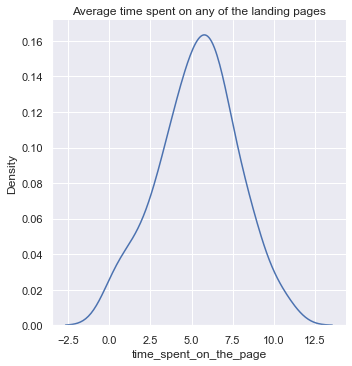

In [315]:

plt.figure(figsize=(100,100))
sns.displot (x=df['time_spent_on_the_page'], kind='kde')
plt.title('Average time spent on any of the landing pages', loc='center')
plt.plot()

In [316]:
#By applying decribe function to only the categorical variable we can obtain very interested information.
df.describe(include='category')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,new,yes,French
freq,50,50,54,34


### Additional information for categorical variables

In [317]:
df['language_preferred'].unique()#number and name of  each language

['Spanish', 'English', 'French']
Categories (3, object): ['Spanish', 'English', 'French']

In [318]:
df['language_preferred'].value_counts()#number of languages selected along with their counts.

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

In [319]:
df[df['group']=='control']['group'].value_counts()#number of individuals in the control group


control      50
treatment     0
Name: group, dtype: int64

In [320]:
df[df['group']=='treatment']['group'].value_counts()#number of individuals in the treatment group

treatment    50
control       0
Name: group, dtype: int64

### Summary categorical variables


Variable Group:
 
There are two different kinds of groups, control and treatment. The first one is the one that will be using the old landing page, whereas the treatment group will be using the new one. As per the information shown in the chart, the most frequent type of user is  the control group, what is unacuarte, because when we check the frequency it is 50 per cent, therefore the are both groups equal in number of individuals.

Landing_page:

we are testing two different landing pages, the new one and the old one. They are both equal included in equal proportions since the frequency is 50 per cent.

Language_preferred:

As we can see, there are 3 different languages. The information shows that the most preferred language was French (according to the initial summary) but when we found additional information, it turned out that French and Spanish were preferred both with the same frequency of 34% and English will be in second position with only 32% of the time selected. 

Converted:

This variable is indicating the conversion rate, the number of people that become subscribers after visiting the landing page. Since 'yes' is the top value, with a frequency of 54% we can assume that more than the half of the people that visited  any of the landing pages were interested in becoming a member or subscriber.



### Univariate Analysis

In [321]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="yellow", linestyle="-"
    )  # Add median to the histogram


In [322]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

### Time spent on landing page

Text(0.0, 1.0, 'Time spent on the landing page')

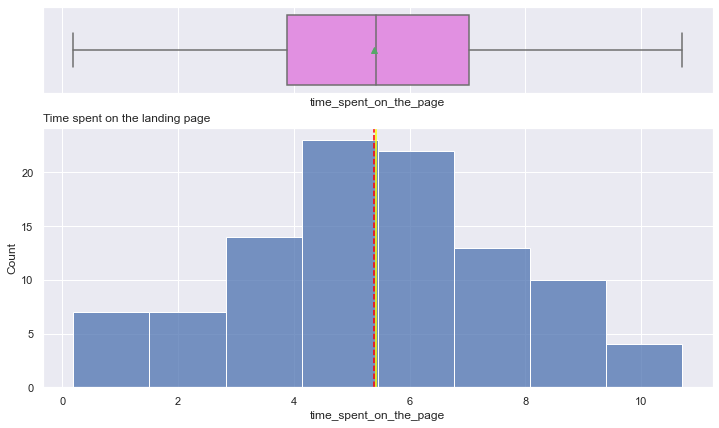

In [323]:
histogram_boxplot(df,'time_spent_on_the_page', figsize=(12, 7), kde=False, bins=None)
plt.title('Time spent on the landing page', loc='left')
#We are plotting numerica variable 'time_spent_on_landing_page' by using an histagram and a boxplot to find further details.

In [434]:

"""In order to compare both mean and median we calculated separately so we can see the specific values"""
Mean_t=df['time_spent_on_the_page'].mean()
Mean_time=np.round(Mean_t,4)

Median_t=df['time_spent_on_the_page'].median()
Median_time=np.round(Median_t,4)

std_t=df['time_spent_on_the_page'].std()
std_time=df['time_spent_on_the_page'].std()

print(F'The mean value {Mean_time} and the median value {Median_time} are very similar. The standard deviation is {np.round(std_time,4)}.')




The mean value 5.3778 and the median value 5.415 are very similar. The standard deviation is 2.3782.


After some analysis of the variable 'time_spend_on_landing_page' we can conclude that the average user will spend about a bit more than 5 minutes (5.37) on the Enews Express landing page. There not outliers and the plot is very symmetrical, it seems that the values are positioned around the mean and there is a very slight left skewness. Overall, we could say that the plot shape is very similar to a bell shape.

### User ID

Text(0.0, 1.0, 'User id')

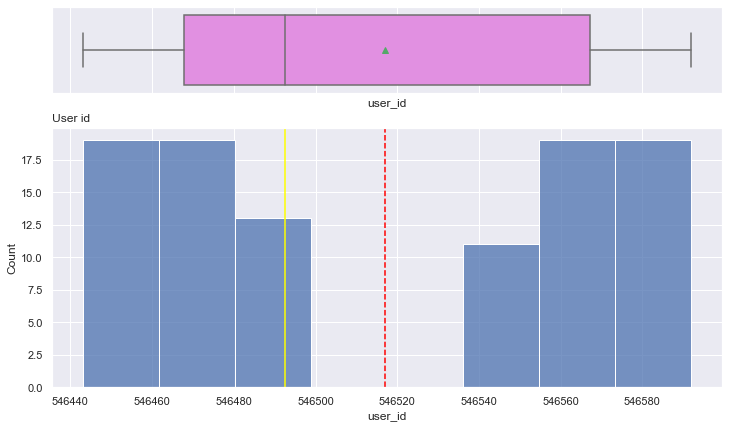

In [325]:
'''We are plotting the variable user Id to identify any new details. It is considered numerical so we are using 
histogram and boxplot.'''  
histogram_boxplot(df,'user_id', figsize=(12, 7), kde=False, bins=None)
plt.title('User id', loc='left')


In [326]:
number_of_sample_test=df['user_id'].value_counts().sum()
print(f'The total number of users that are taking part on the test experiment are {number_of_sample_test}.')

The total number of users that are taking part on the test experiment are 100.


As expected, the number of users that have been divided in two groups to test the landing page are 100. In the histogram, 
we can see that the values are divided in two big similar blocks, that could have been related to the mentioned two groups: control group and the treatment group, so the system may be assigning different numbers depending on the groups. The mean and the median values do not provide with any relevant information for the analysis, since the id number is randomly assigned to each individual.

### Group

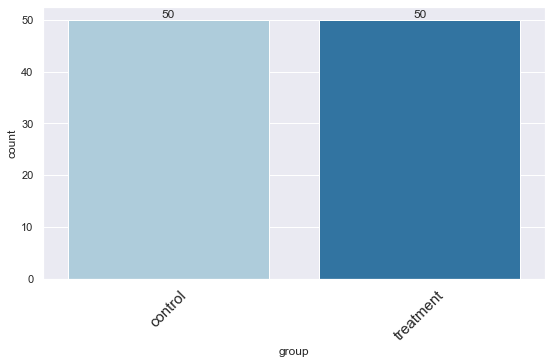

In [327]:
'''As the group variable is as categorical variable, we are plotting the data by using a barplot'''
labeled_barplot(df,'group', perc=False, n=8)





The groups of study for Enews Express are the control group and the treatment group. As mentioned at the beginning of this 
report, the number of users tested is 100 and they have been divided in equal proportions to both groups, therefore each group holds 50 individuals.


### Landing page 

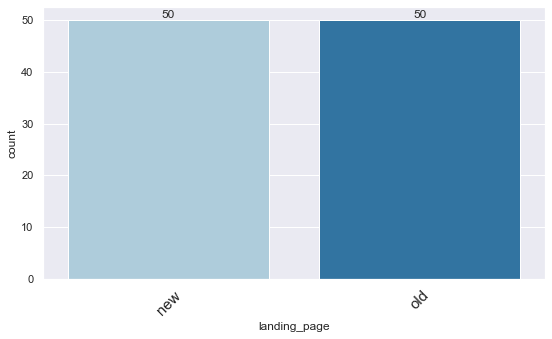

In [328]:
labeled_barplot(df,'landing_page', perc=False, n=8)# We use barplot to visualize the categorical variable landing page.

There are two different landing pages, the old one and the new one. Both landing pages have been tested during the test 
experiment, so 50 individual are testing the old landing page and other 50, are testing the new landing page.

### Converted users- New subscribers

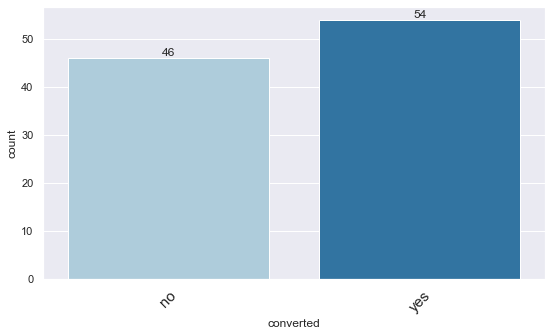

In [329]:
labeled_barplot(df,'converted', perc=False, n=8)# We use barplot to visualize the categorical variable converted.

The number of users that after visiting any of the landing pages decided to become a subscriber is 54, while 46 users decided that they will not subscribe to ENews Express. So, 54% of the overall users were attracted by one of the landing pages. As per the case statement, each of these individuals only had the opportunity to use one of the landing pages. Further research will be needed to find out which of the landing pages was more attractive for the users.

### language_preferred

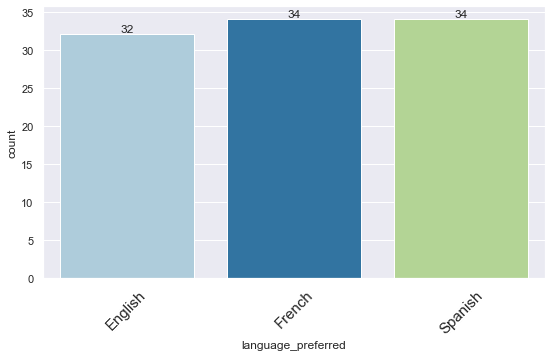

In [330]:
labeled_barplot(df,'language_preferred', perc=False, n=8)
# we use barplot to visualize the variable preferred_language, which is categorical.

The above graphic representation just confirms what we suspected on our initial approach, when reviewing the summary information of the variables. There are two languages, French and Spanish, that are preferred with a 34% each of them. English is the less preferred language for the users of the landing page.

### Bivariate Analysis

### Numerical variables pairplot

<Figure size 1080x720 with 0 Axes>

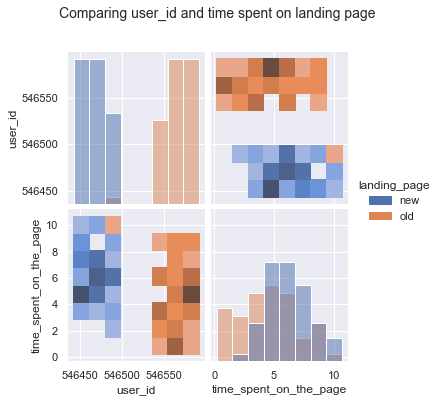

In [331]:
'''The pairplot will help us see any relation or pattern between variables. In this case, we are using the landing 
page as a hue to observe patterns in relation with the different landing pages.''' 

plt.figure(figsize=(15,10))
sns.pairplot(data=df, hue='landing_page', kind='hist')
plt.text(x=-13,y=45,s='Comparing user_id and time spent on landing page', fontsize=14)
plt.show()


As we initially suspected, the old landing page users and the new landing page users have been assigned different ranges of numbers of identification, with the exception of one person of the lower numbers range that was assigned to the old page. We cannot see any relationship between the number assigned and the time spent on the landing page.

Text(0.5, 1.0, 'Heatmap for numeric variables: time spent on website and user id')

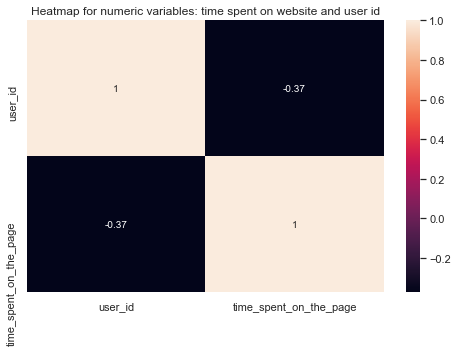

In [332]:
plt.figure(figsize=(8,5))
sns.heatmap( df.corr(), annot=True)# we use the heatmap for the numrical variables to find out any assotiation.
plt.title('Heatmap for numeric variables: time spent on website and user id', fontsize=12)

When using the heatmap to find any correlation between the above variables, time_spent_on_landing_page and user_id, we do not find any significant relation. the correlation is closer to 0 than 1, so they are independent variables.

### Time spend on each landing page

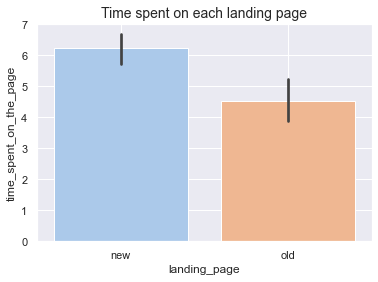

In [333]:
sns.barplot(data=df, x='landing_page', y ='time_spent_on_the_page', palette= 'pastel')
plt.title('Time spent on each landing page', fontsize=14)#add title
plt.grid(b=True)#add grid 
plt.show()
#as we analize categorical and numerical variables, we can apply the seaborn function barplot.

The information that the graphic representation shows it that the users tend to spend more time on the new landing page, therefore, we would need to do further research to know if the new one is more attractive for the users. Also, the confidence interval, shows more variability or dispersion on the time outcome for the old landing page.

### Time spent on each landing page and number of new subscribers

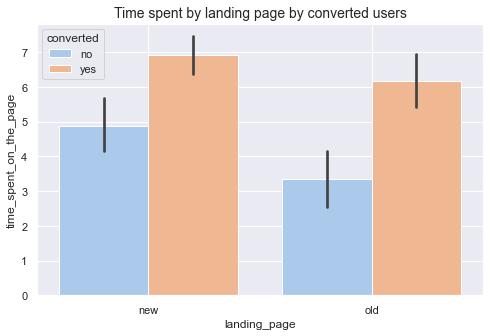

In [334]:
'''#as we analyze categorical and numerical variables, we can apply the seaborn function barplot. The hue argument
allows to find out the number or proportion of people that subscribed after testing their respective landing
pages. We are using barplot from seaborn'''
plt.figure(figsize=(8,5))# set size for the plot
sns.barplot(data=df, x='landing_page', y ='time_spent_on_the_page', hue="converted", palette= 'pastel')
plt.grid(b=True)#set grid
plt.title('Time spent by landing page by converted users', fontsize=14)#set title
plt.show()


The new landing page seems to be more attractive for their visitors. The above plot shows a higher conversion rate for the new website landing page. Even the visitor that decided not to subscribe spend longer time on the new landing page. In both groups, the ones using the new landing page and old landing page, the time spend on the website varies a lot among individuals. Also, the dispersion seems a bit smaller for the new page subscribers, that spent the longer times on the web.

### New subscribers per group( converted)

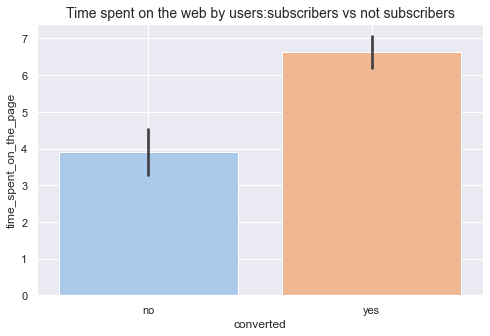

In [335]:
plt.figure(figsize=(8,5))#set size
sns.barplot(data=df, x='converted', y ='time_spent_on_the_page', palette= 'pastel')#plot data by using seaborn
plt.title('Time spent on the web by users:subscribers vs not subscribers', fontsize=14)#add title
plt.grid(b=True)#add grid
plt.show()


The plot is clearly telling us that the users that became subscribers spent an average of two more minutes(around 6 minutes) over the ones that did not subscribed( about 4 minutes).



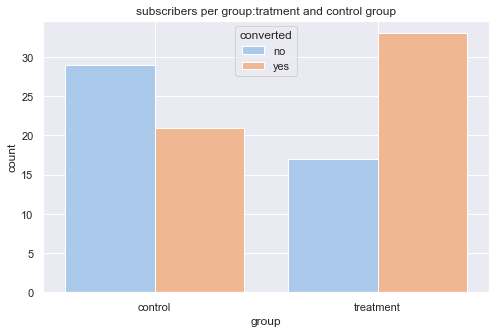

In [336]:
plt.figure(figsize=(8,5))#set size
sns.countplot(data=df, x=df['group'],hue=df['converted'], palette='pastel')
#We are using seaborn countplot to plot the group data and by adding the hue we add the converted variable 
ax=plt.title('subscribers per group:tratment and control group')
plt.grid(b=True)#add grid
plt.show()

The graphic is making a very powerful statement. In the group of control (the one using the old landing page), the visitors that eventually subscribed where less in proportion than the ones that did not subscribe. The opposite behavior can be seen in the treatment group, in which most of them became subscribers.

### Language preferred and new subscribers

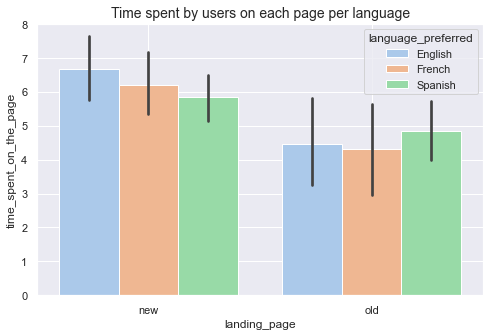

In [337]:

'''we are ploting a barplot for a categorical variable and a numeric. The hue argument will let us know how the language affect the time spent on the web.'''
plt.figure(figsize=(8,5))#setting size for the plot
sns.barplot(data=df, x='landing_page', y ='time_spent_on_the_page', hue='language_preferred', palette='pastel')
plt.title('Time spent by users on each page per language', fontsize=14)#set title
plt.grid(b=True)#show grid
plt.show()

As expected, the average time of users of each language in the new landing page exceeded
the time spent on the old page. The variability of the time spent on the landing page is also higher for the old page. 
The group that visited the old page in Spanish spent the greatest number of minutes among the three groups of languages (English, Spanish and French), followed by English speakers and in the last position the French ones.
For the new landing page, all the users are spending longer times in comparison with the old landing page, but the English speakers are leading the number of minutes, followed by French speakers and in last position the Spanish ones.




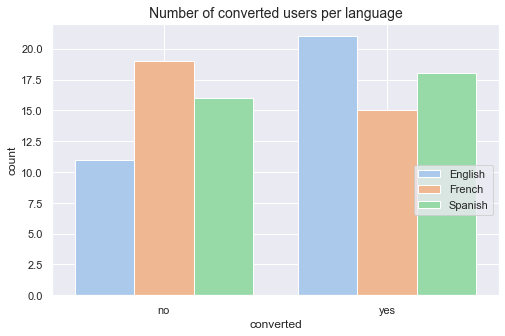

In [338]:
'''Countplot function to analyze one categorical variable. We use the hue argument to distinguish the different 
patterns in relation with the users' language '''
plt.figure(figsize=(8,5))#set size
sns.countplot(data=df, x='converted', hue='language_preferred', palette='pastel')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))#position legend
plt.title('Number of converted users per language', fontsize=14)#add title
plt.grid(b=True)#add grid
plt.show()

Text(0.5, 1.0, 'Converted by language and landing page')

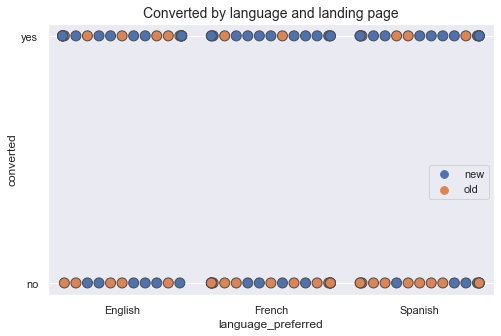

In [339]:
'''Swarmplot will allow us plot different categorical variables at once'''
plt.figure(figsize=(8,5))#set size
sns.swarmplot (data=df, y=df['converted'], x=df['language_preferred'], hue=df['landing_page'],linewidth=1,size=10)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))#legend location
plt.title('Converted by language and landing page', Fontsize=14)#add title

The above plot is showing us the number of subscribers per language for both landing pages.
For the Spanish speakers, the difference is not that much but still more users decided to subscribe after visiting the new landing page in comparison to the old one. (an average of 16 subscribers for the old page versus around 18 for the new one).
When analyzing the data for the English Speakers, the change is substantial. They are the one that subscribed the most after using the new landing page. The number of subscribers almost double when compared to the old page visitors (only 11 subscribers for the old landing page versus 21 subscribers the new landing page).
The French speakers are the ones that feel more attracted to the old landing page. in fact, the number of subscribers after visiting the new page is less than for the old landing page, (around 19 subscribers for the old landing page in comparison to 15 subscribers after visiting the new page). Generally speaking, we can suppose that the French users do not feel the new landing page is as interesting as the old one.


### Group and language sampling

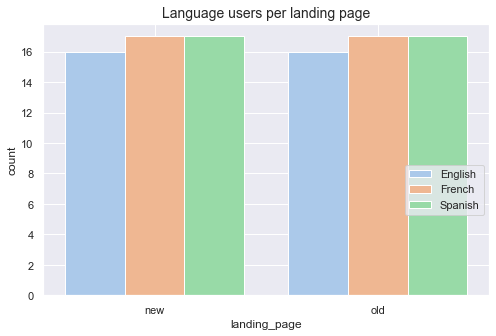

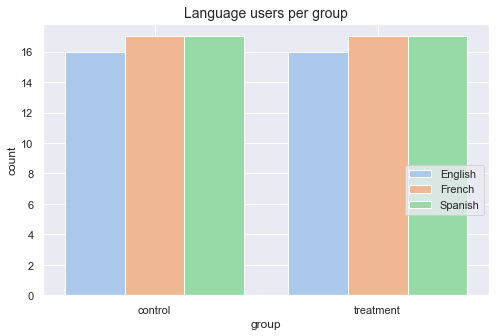

In [340]:

'''Countplot function will help us analize the categorical variable landing_page. When using the hue argument we can
compare the number of users by their preferred language'''
plt.figure(figsize=(8,5))#setting size of the plot
sns.countplot(data=df, x=df['landing_page'],hue=df['language_preferred'], palette='pastel')
plt.title('Language users per landing page', fontsize=14)#add title
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))#position legend
plt.grid(b=True)# the grid function will help to see the values on the y axis.
plt.show()

'''Countplot function will help us analize the categorical variable group. When using the hue argument we can
compare the number of users by their preferred language per group (control or treatment)'''
plt.figure(figsize=(8,5))#set size
sns.countplot(data=df, x=df['group'],hue=df['language_preferred'], palette='pastel')#use seaborn countplot function
plt.title('Language users per group', fontsize=14)#set title
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))#position legend
plt.grid(b=True)# the grid function will help to see the values on the y axis.
plt.show()

Both graphics are providing similar information. The number of users per language are the same for the old and new landing pages: 17 people for Spanish and French and 16 for English for each group. Since the control group is only using the old landing page and the treatment group is only using the new page, the numbers are exactly the same when comparing language users per group to the language users per landing page.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

In [341]:
Mean_time_spent_old_landing_page= df[df['landing_page']=='old']['time_spent_on_the_page'].mean()
#Calculating mean time spent on the old landing page by users

In [342]:
Mean_time_spent_new_landing_page= df[df['landing_page']=='new']['time_spent_on_the_page'].mean()
#Calculating mean time spent on the old landing page by users

In [343]:
print(f'The mean time spent on new landing page is {np.round(Mean_time_spent_new_landing_page,2)} and the  average time on the old landing page is {np.round(Mean_time_spent_old_landing_page,2)}')

The mean time spent on new landing page is 6.22 and the  average time on the old landing page is 4.53


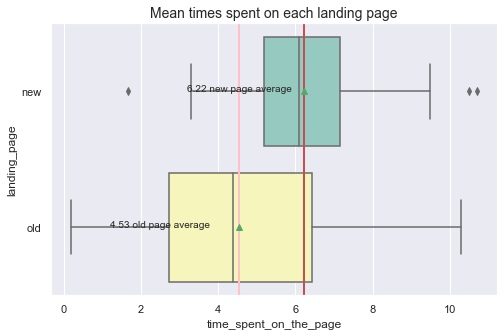

In [344]:
plt.figure(figsize= (8,5))# size figure
sns.boxplot(x=df['time_spent_on_the_page'], y= df['landing_page'], showmeans=True,palette="Set3")#plotting variables
plt.axvline(x= 6.22, linewidth=2, color='r' )#creating a line for new landing page average time
plt.axvline(x= 4.53, linewidth=2, color='pink' )#creating a line for new landing page average time
plt.title('Mean times spent on each landing page', fontsize=14)#Creating a title
plt.text(x=1.20,y=1, s='4.53 old page average')#adding text to the graph for old page average
plt.text(x=3.20,y=0, s='6.22 new page average')#adding text to the graph for new page average
plt.show()


The boxplot is showing a significant difference between the time spent on the old and new landing pages by the two groups.
At first sight we could suspect that the mean time spent on the new landing page is greater than the mean time spend on
the old one. It is important to highlight that there are some outliers for the time spent on the new landing page, that could affect the mean value, so this specific sample may differ from the of the overall population behavior. We need to do some research to be able to conclude that our initial perception this is true.



### Step 1: Define the null and alternate hypotheses


We need to test if the mean time spent on the new landing page is greater than the mean time spent on the old landing page. In order to test both mean values, we are supposing that for the null hypothesis both means are the same and for the alternative hypothesis the mean time value is greater for the new landing page than for the old one.
$\mu$1 is the mean time value for the old landing page.
$\mu$2 is the mean time value for the new landing page.

#### null hypothesis
$H_0$: $\mu$1=$\mu$2

#### alternative hypothesis
$H_a$: $\mu$1<$\mu$2

### Step 2: Select Appropriate test

In this case we are performing a one-tailed t-test for two independent samples for equality of means with unequal standard deviation.
We are assuming that after comparing the two samples, the population standard deviations are unequal (both standard deviations are shown below).

Let's check the assumptions:
- Continuous data. Yes, time is considered a continuous variable.
- Normally distributed populations. Yes, as per the central limit theorem, the sample means can be approximate to a normal distribution, since their size is greater than 30 (in this case the number of users is 50 per sample).
- Independent populations. We are taking the samples from two different groups: the control group and the treatment group, therefore, they are two independent populations.
- Unequal standard deviations. The standard deviation for both samples are different, so since we do not know the standard deviation for both populations, we can assume they are also different.
- Random sampling from the population. Yes, the case study let us know that the 100 users have been selected randomly and divided into the two mentioned groups: control and treatment.


In [345]:
std_time_spent_new_page=df[df['landing_page']=='new']['time_spent_on_the_page'].std()

In [346]:
std_time_spent_old_page=df[df['landing_page']=='old']['time_spent_on_the_page'].std()

In [347]:
print(f'The standard deviation is unequal for the time spent on both old and new landing page. The standard deviation for the time spent on the new landing page is {np.round(std_time_spent_new_page,2)} minutes and the standard deviation spent for the time spent on the old landing page is {np.round(std_time_spent_old_page,2)} minutes')

The standard deviation is unequal for the time spent on both old and new landing page. The standard deviation for the time spent on the new landing page is 1.82 minutes and the standard deviation spent for the time spent on the old landing page is 2.58 minutes


We can also apply levene's test to find out if their variances are different or not. To use levene test to check the equality of variances, we need to set our the null hypothesis and alternative:

#### null hypothesis
𝐻0 :  both population variances are equal

#### alternative hypothesis
𝐻𝑎 :  population variances are unequal

0.05 is the level of significance (alpha)



In [348]:
alpha=0.05

In [349]:
levene_stat_t, levene_pvalue_t= stats.levene(Time_spent_users_old_landing_page,Time_spent_users_new_landing_page)
print( f' levene_pvalue  is {np.round(levene_pvalue_t,4)}')

 levene_pvalue  is 0.009


In [425]:
if levene_pvalue_t< alpha:
    print('variances are not equal because levene_pvalue is less than the level of significance alpha, so we reject the null hypothesis of homogeneity of variances')
else:
     print('variances are equal because levene_pvalue greater than the level of significance alpha, so we fail to reject the null hypothesis of homogeneity of variances')   

variances are not equal because levene_pvalue is less than the level of significance alpha, so we reject the null hypothesis of homogeneity of variances


Therefore we are using a one-tailed t-test for two independent samples for equality of means with unequal standard deviation.

### Step 3: Decide the significance level

The level of significance (alpha) is $\alpha$=0.05. The case study provides with the information.

In [351]:
alpha = 0.05

### Step 4: Collect and prepare data

We are using the function ttest_ind from scipy.stats. In order to use this function, we are peparing the two groups of data to enter in the different arguments.


In [352]:
#sample population 1. times spent by users of the old landing page
Time_spent_users_old_landing_page= df[df['landing_page']=='old']['time_spent_on_the_page']
#sample population . times spent by users of the new landing page
Time_spent_users_new_landing_page=df[df['landing_page']=='new']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [433]:
test_stat, p_value=ttest_ind(Time_spent_users_old_landing_page,Time_spent_users_new_landing_page, equal_var=False ,alternative='less')
print(f'the test statistice is {np.round(test_stat,4)} and the p_value is {np.round(p_value,4)}')

the test statistice is -3.7868 and the p_value is 0.0001


### Step 6: Compare the p-value with $\alpha$

In [354]:
if p_value < alpha:
    print(f'We reject the null hypothesis since {np.round(p_value,4)} is less than the level of significance')
else:
    print(f'We fail to reject the null hypothesis because {np.round(p_value,4)} is greater than level of significance')

We reject the null hypothesis since 0.0001 is less than the level of significance


### Step 7:  Draw inference

When we compare the p_value and the level of significance, p_value is < $\alpha$, therefore we reject the null hypothesis.  We can conclude that the mean times spend by users on both landing pages are not equal, as we initially supposed, users spend longer times visiting the new landing page.


In [423]:

#t distribution degrees of freedom for two distrition = (size_sample1 + size_sample2) - 2
print(F' t_distribution with {50+50-2} degrees of freedom')

 t_distribution with 98 degrees of freedom


In [356]:
Critical_value= t.ppf(0.05, 98)
print(f'critical value is {np.round(Critical_value,2)}')

critical value is -1.66


In [357]:
x=np.linspace(-5,5,100)# we create the range of values for time_spent_on_landing_page
x1=np.linspace(-4,Critical_value,100)

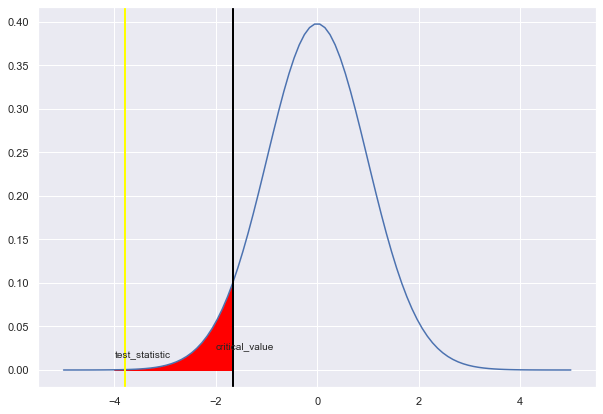

In [358]:
plt.figure(figsize=(10,7))
plt.plot(x, t.pdf(x,98))# we plot the density distribution by using the normal function
plt.axvline(x= -3.786, linewidth=2, color='yellow' )#we draw the test_statistic value
plt.axvline(x= -1.66, linewidth=2, color='black' )# we draw the critical value
plt.text(x=-4,y=0.015, s='test_statistic')#we add text on the plot with names for the lines
plt.text(x=-2,y=0.025, s='critical_value')#we add text on the plot with names for the lines
plt.fill_between(x1, t.pdf(x1,98), color='red') 
# fill the area under the curve after the critical value with red color to show the rejection area


**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Perform Visual Analysis

Text(0, 0.85, '21 converted new page')

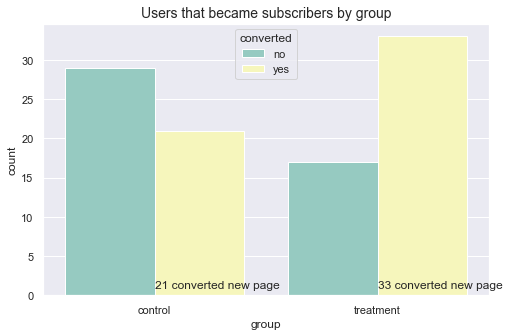

In [359]:
plt.figure(figsize=(8,5))#set the size of the plot
sns.countplot (x= df['group'], hue=df['converted'], data=df, palette='Set3')
#countplot will allow to plot two categorical variables as landing_page and Converted as hue argument.
plt.title('Users that became subscribers by group', fontsize=14)#We add a title
plt.text(x=1,y=0.85, s='33 converted new page', fontsize=12)#add text
plt.text(x=0,y=0.85, s='21 converted new page', fontsize=12)#add text

In [360]:
users_new_page=df[df['group']== 'treatment']['converted'].count()#number of users of new page

In [361]:
users_converted_new_page=df[df['group']=='treatment']['converted'].value_counts()['yes']
#users of the new page the subscribed


In [362]:
'''we print out the proportions for the new landing page'''
print(f'For {users_new_page} users of the new page, the converted users are {users_converted_new_page}')

For 50 users of the new page, the converted users are 33


In [363]:
users_old_page=df[df['group']== 'control']['converted'].count()#number of users of old page

In [364]:
users_converted_old_page=df[df['group']== 'control']['converted'].value_counts()['yes']
#users of the old page the subscribed

In [365]:
'''we print out the proportions for the old landing page'''
print(f'For {users_old_page} users of the new page, the converted users are {users_converted_old_page}')

For 50 users of the new page, the converted users are 21


As we can see, the number of users that became subscribers are greater for the new landing page.
We will need to find out if the same outcome can be inferred for the population.

### Step 1: Define the null and alternate hypotheses¶

We would like to find out if the proportion of conversion rate (users that become subscribers) is the same for both landing pages or on the contrary, greater for the new landing page.
$p1$ is the proportion of conversion for the old landing page (control group). $p2$ is the rate of converstion for the new landing page (treatment group).

#### null hypothesis
$H_0$: $p1$ = $p2$

#### alternative hypothesis
$H_a$: $p1$ < $p2$



### Step 2: Select Appropriate test


This is a one-tailed z-test for two population proportions.
Let's check the assumptions:
- Binomially distributed population. Yes, an user either convert or not.
- Random sampling. Yes, it is given by the case study.
- We can approximate the binomial distribution to a normal distribution by the Central limit theorem if np and n(1-p) are bigger than 10 for each group. yes, as we are showing below, all the values we obtained after calculating the number of observations per group and number of converted users are greater than 10.


In [366]:
n1=users_old_page
n2=users_new_page
p1=users_converted_old_page/users_old_page
p2=users_converted_new_page/users_new_page


In [367]:
n1*p1, np.round(n1*(1-p1),2),n2*p2, n2*(1-p2)# all the values are greater than 10

(21.0, 29.0, 33.0, 17.0)

### Step 3: Decide the significance level

We are given the level of significance $\alpha$, that is 0.05. 

In [368]:
alpha= 0.05

### Step 4: Collect and prepare data¶

In [369]:
n_converted=[users_converted_old_page,users_converted_new_page]

In [370]:
n_converted

[21, 33]

In [371]:
total_users_per_group=[users_old_page,users_new_page]

In [372]:
total_users_per_group

[50, 50]

### Step 5: Calculate the p-value

In [373]:

test_stat2, p_value2= proportions_ztest(n_converted,total_users_per_group, alternative='smaller')
print(f' t_test is {np.round (test_stat2,4)},P_value is {np.round(p_value2,4)}')

 t_test is -2.4077,P_value is 0.008


### Step 6: Compare the p-value with $\alpha$

In [422]:
if p_value2 < alpha:
    print(f'Since p_value is {np.round(p_value2,4)},that is less than alpha, we reject the null hypothesis ')
else:
    print(f'Since p_value is {np.round(p_value2,4)}, that is is greater than alpha, we fail to reject the null hypothesis')


Since p_value is 0.008,that is less than alpha, we reject the null hypothesis 


### Step 7: Draw inference¶

The P_value is lower than the level of significance,alpha, therefore we reject the null hypothesis. We can we conclude that the proportion of users that became subscribers of ENews_Express after visiting the old landing page is different from the ones that visited the new landing page. The proportion of converted users is larger for the new landing page. 

In [375]:
Critical_value2=norm.ppf(0.05,0,1)#we find the critical value to learn where the rejection area starts.

In [376]:
print(f' the critical value is {np.round(Critical_value2,2)}.')

 the critical value is -1.64.


In [377]:
x3= np.linspace(-3,3,100) #we create a variable x3 for the axis x


In [378]:
x4=np.linspace(-3,Critical_value2,100)#area under the curve up to the  critical value

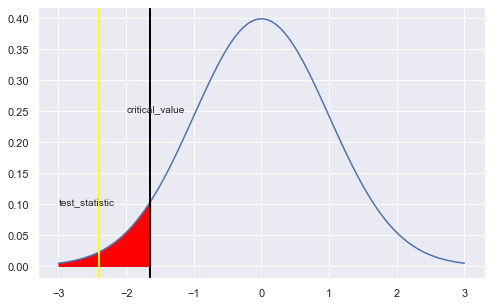

In [379]:
#Since the distribution can be approximate to a normal, we are using a standard normal distribution
plt.figure(figsize=(8,5))
plt.plot(x3,norm.pdf(x3,0,1))
plt.axvline(x= -2.4077, linewidth=2, color='yellow' )#we draw the test_statistic value
plt.axvline(x= -1.64, linewidth=2, color='black' )# we draw the critical value
plt.text(x=-3,y=0.1, s='test_statistic')#we add text on the plot with names for the lines
plt.text(x=-2,y=0.25, s='critical_value')#we add text on the plot with names for the lines
plt.fill_between(x4,norm.pdf(x4,0,1),color='red') 
# fill the area under the curve after the critical value with red color to show the rejection area

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

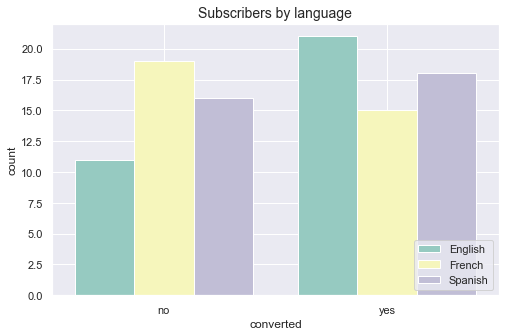

In [380]:
plt.figure(figsize= (8,5))#set size
sns.countplot(x=df['converted'], hue=df['language_preferred'], palette="Set3")
#we use countplot along with the argument hue to plot both variables, language_preferred and converted
plt.legend(loc='lower right')#legend location
plt.grid(b=True)#add grid
plt.title('Subscribers by language', fontsize=14)#add title
plt.show()

The graphic representation is telling us that for both groups, the visitors that subscribed the most were the English speakers, followed by the Spanish speakers and in last position the French speakers.Language could be related to the language preferred but we need to perform a test in order to coclude that. 

### Step 1: Define the null and alternate hypotheses


We need to find out if both categorical variables, the converted users (users that subscribed) and the language are related. Basically, we need to test if converted users and language_preferred are independent variables or not. 

#### null hypothesis
$H_0$: Converted and language_preferred variables are independent 

#### alternative hypothesis
$H_a$: Converted and language preferred variables are related 


### Step 2: Select Appropriate test


The test we need to apply is Chi_square test for independence in order to check the independence of both variables.

Let's check the assumptions:
-categorical variables. yes, language_preferred and converted are both categorical
-expected number observations for each level is at least 5. Yes, we have more than 5 observations for the three languages and for the converted variable (yes or no).
-Random sampling. yes, as indicated at the beginning of the case.



### Step 3: Decide the significance level

As per the case study initial information, we are informed that the level of significance (alpha) is 0.05.

In [381]:
alpha=0.05

### Step 4: Collect and prepare data

In [382]:
Table=pd.crosstab(df['converted'],df['language_preferred'] )

We create a contingency table by using the function crosstab. We have selected the two variables that we need to analyze and the cross-table function will count the frequencies by default.


In [383]:
Table[['English','French','Spanish']]

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [384]:
chi2, p_value3, dof, exp_freq = chi2_contingency(Table)
print(f' The test-stat is {np.round(chi2,4)} and the p_value {np.round(p_value3,4)}, degree of freedom {dof}')

 The test-stat is 3.093 and the p_value 0.213, degree of freedom 2


### Step 6: Compare the p-value with $\alpha$

In [385]:
if p_value3 < alpha:
    print(f' We reject the null hypothesis since p_value {np.round(p_value3,4)} is less than alpha')
else:
    print(f' We fail to reject the null hypothesis since p_value {np.round(p_value3,4)} is greater than the alpha')

 We fail to reject the null hypothesis since p_value 0.213 is greater than the alpha


### Step 7:  Draw inference

According to our analysis, the chi-Square test for independence is telling us that the null hypothesis is true, the language_preferred and the rate of conversion (number of users that became subscribers) are independent. So,the decision  to subscribe after visiting any of the landing pages was independent of the language preference for the different individuals.

In [386]:
'''From stats we are using chi square distribution to find out the critical value. We are 
using a chi2 of 2 degree of freedom since the number of rows of the contigency table are 2 
and the columns are 3.The df for the chi2 for independence are number of (rows-1)*(columns-1)
that is (2-1)*(3-1)=2. The chi2 test for independence is a right tailed test.'''
import scipy.stats as stats
from scipy.stats import chi2
critical_value3=stats.chi2.ppf(0.95, df=2)
print(F' The critical value is {np.round(critical_value3,4)}')

 The critical value is 5.9915


In [387]:
import scipy.stats as stats
from scipy.stats import chi2 # we import the chi2 function


In [388]:
x5=np.linspace(0,10,50)#creating x-axis to plot the chi2 density function

In [389]:
x6=np.linspace(critical_value3,10,50)# creating the x axis to color the rejection area

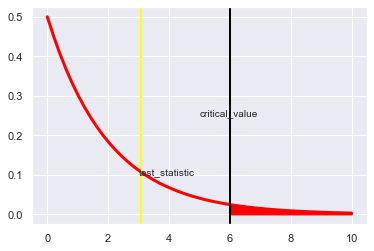

In [390]:
plt.plot(x5, stats.chi2.pdf(x5,df=2), color='red', linewidth=3)
plt.axvline(x= 3.093, linewidth=2, color='yellow' )#we draw the test_statistic value
plt.axvline(x= 5.9915, linewidth=2, color='black' )# we draw the critical value
plt.text(x=3,y=0.1, s='test_statistic')#we add text on the plot with names for the lines
plt.text(x=5,y=0.25, s='critical_value')#we add text on the plot with names for the lines
plt.fill_between(x6,stats.chi2.pdf(x6, df=2),color='red')

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

In [391]:
#We select the variables we are interested to work with a sub_table
time_landing_page_language= df[['landing_page','language_preferred','time_spent_on_the_page']]

In [392]:
#We select only the rows that apply to the new landing page by using a new sub-table.
new_page_time_language=time_landing_page_language[time_landing_page_language['landing_page']== 'new']

In [393]:
new_page_time_language.head()

,landing_page,language_preferred,time_spent_on_the_page
1,new,English,7.13
2,new,Spanish,4.40
4,new,Spanish,4.75
6,new,French,5.25
8,new,French,10.71


In [394]:
#We select only the variables which preferred language is Spanish.
new_page_Spanish_time=new_page_time_language[new_page_time_language['language_preferred']== 'Spanish']

In [395]:
new_page_Spanish_time.head()

,landing_page,language_preferred,time_spent_on_the_page
2,new,Spanish,4.40
4,new,Spanish,4.75
12,new,Spanish,5.86
15,new,Spanish,6.27
24,new,Spanish,6.18


In [396]:
#The mean time spent on the landig page by users that use the new page in Spanish
mean_time_Spanish_new_page=new_page_Spanish_time['time_spent_on_the_page'].mean()


In [397]:
#We select only the variables which preferred language is French.
new_page_French_time=new_page_time_language[new_page_time_language['language_preferred']== 'French']

In [398]:
new_page_French_time.head()#show the first rows of the table

,landing_page,language_preferred,time_spent_on_the_page
6,new,French,5.25
8,new,French,10.71
13,new,French,6.03
28,new,French,7.81
46,new,French,5.37


In [399]:
#The mean time spent on the landig page by users that use the new page in French
mean_time_French_new_page=new_page_French_time['time_spent_on_the_page'].mean()


In [400]:
#We select only the variables which preferred language is English.
new_page_English_time=new_page_time_language[new_page_time_language['language_preferred']== 'English']

In [401]:
new_page_English_time.head()#shows first rows of the table

,landing_page,language_preferred,time_spent_on_the_page
1,new,English,7.13
16,new,English,8.73
22,new,English,3.65
23,new,English,7.02
25,new,English,4.39


In [402]:
#The mean time spent on the landig page by users that use the new page in French
mean_time_English_new_page=new_page_English_time['time_spent_on_the_page'].mean()

In [403]:
print(f'The mean times spent on the new landing page depending on the language preferred are:  {np.round(mean_time_French_new_page,2)} for French, {np.round(mean_time_Spanish_new_page,2)} for Spanish and {np.round(mean_time_English_new_page,2)} for English')

The mean times spent on the new landing page depending on the language preferred are:  6.2 for French, 5.84 for Spanish and 6.66 for English


Text(1.75, 5.75, 'mean_time=5.33')

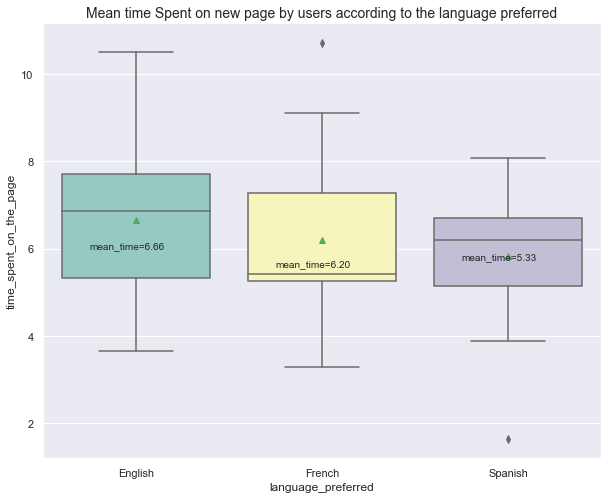

In [404]:
'''Since we hae va categorical and numeric variables, we are plotting the mean times of each
variable according to the language by using a boxplot.'''
plt.figure(figsize=(10,8))# set size
sns.boxplot(data=new_page_time_language, y=new_page_time_language['time_spent_on_the_page'], x= new_page_time_language['language_preferred'], showmeans=True, palette='Set3' )
plt.title('Mean time Spent on new page by users according to the language preferred', fontsize=14)# add title
plt.text(x=-0.25, y=6, s= 'mean_time=6.66')#add text mean for English
plt.text(x=0.75, y=5.60, s= 'mean_time=6.20')#add text mean for French
plt.text(x=1.75, y=5.75, s= 'mean_time=5.33')#add text mean for Spanish

After plotting the time spent by language_preferred on the new landing page, we can see the mean times are different but there are outliers that could be affecting this specific samples for French and Spanish language. We need to perform a test to conclude if the mean times are different.
We have to analyze if the means for the time spent on the new landing page is equal or different for the three languages: French, Spanish and English.


### Step 1: Define the null and alternate hypotheses

We have to analyze if the means for the time spent on the new landing page is equal or different for the three languages: French, Spanish and English.

$\mu1$ is the mean time for English users

$\mu2$ is the mean time for French users

$\mu3$ is the mean time for Spanish users

For the null hypothesis we are going to consider that the three mean times are equal. The alternative hypothesis will oppose to the null by considering that at least one mean time is unequal.

#### null hypothesis
$H_0$:$\mu1$=$\mu2$=$\mu3$   

#### alternative hypothesis
$Ha$: at least one mean time is not equal to the other mean times 

### Step 2: Select Appropriate test

We are required to test the mean value of three different distributions. In this case we are using one_way ANOVA test.

Let's check the assumptions:
- Populations are normally distributed. we need to apply the Shapiro-wilk's test to test normality.
- Samples are independent, simple samples. Yes, it is given in the case statement.
- population variances are equal. We need to apply the Levene’s test to test if all the variances are equal.


#### Test shapiro-wilk test for normality.

We define the null and alternative hypothesis and the alternative hypothesis:

#### null hypothesis
$H_0$: The time spent on the new landing page follows a normal distribution 

#### alternative hypothesis
$H_a$:The time spent on the new landing page does not follow a normal distribution 




In [405]:
#The level of significance (alpha) for the test is 0.05

alpha= 0.05

In [406]:
shapiro_test_stat, shapiro_p_value=stats.shapiro(new_page_time_language['time_spent_on_the_page'])
print(f'The test_statistic is {np.round(shapiro_test_stat,4)} and the Shapiro_P_value is {np.round(shapiro_p_value,4)}')

The test_statistic is 0.9858 and the Shapiro_P_value is 0.804


In [428]:
if shapiro_p_value <alpha:
    print(f'shapiro_p_value is {np.round(shapiro_p_value,4)}, less than alpha. We reject the null hypothesis, therefore the time spent on the new landing page does not follow a normal distibution')
else:
    print(f'shapiro_p_value is {np.round(shapiro_p_value,4)}, greater than alpha. We fail to reject the null hypothesis, therefore the time spent on the new landing page follows a normal distibution')

shapiro_p_value is 0.804, greater than alpha. We fail to reject the null hypothesis, therefore the time spent on the new landing page follows a normal distibution



The time spent on the new landing page follows a normal distribution. It meets the assumption of normality.


#### Test Levene for equality of variances.

We define the null and alternative hypothesis:

#### null hypothesis
$H_0$: all variances are equal for the time spent on the new landing page by English, French and Spanish users 

#### alternative hypothesis
$H_a$:at least one variance is not equal 

In [408]:
#The level of significance (alpha) for the test is 0.05
alpha=0.05


We prepare the data for the test by selecting the times spent on the new landing page by language preferred.

In [409]:
# time spent on the new landing page by English as language preferred.
E=new_page_time_language['time_spent_on_the_page'][new_page_time_language['language_preferred']=='English']

In [410]:
# time spent on the new landing page by French as language preferred.
F=new_page_time_language['time_spent_on_the_page'][new_page_time_language['language_preferred']=='French']

In [411]:
## time spent on the new landing page by Spanish as language preferred.
S=new_page_time_language['time_spent_on_the_page'][new_page_time_language['language_preferred']=='Spanish']

In [412]:
levene_test_stat, levene_p_value=stats.levene(E,F,S)
print(f'The levene_test_stat is {np.round(levene_test_stat,4)} and the levene_p_value is {np.round(levene_p_value, 4)}')

The levene_test_stat is 0.7736 and the levene_p_value is 0.4671


In [413]:
if levene_p_value <alpha:
    print(f'levene_p_value is {np.round(levene_p_value, 4)}, so we reject the null hypothesis, therefore the variances of time spent on the new landing page for the three languages users are different.')
else:    
    print(f'levene_p_value is {np.round(levene_p_value, 4)}, so we fail to reject the null hypothesis, therefore the variances of time spent on the new landing page for the three languages users are equal.')

levene_p_value is 0.4671, so we fail to reject the null hypothesis, therefore the variances of time spent on the new landing page for the three languages users are equal.


The equally of variances  assumption is also verified.
The three assumptions have been verified so we can apply the one way ANOVA test by using the  one_way ANOVA test.

Since all the assumptions are met, we can carry on with the one_way ANOVA test.

### Step 3: Decide the significance level

We are informed in the problem statement that the level of significance (alpha) is 0.05, we select α = 0.05

In [414]:
alpha=0.05

### Step 4: Collect and prepare data

In [415]:
# time spent on the new landing page by English as language preferred.
E=new_page_time_language['time_spent_on_the_page'][new_page_time_language['language_preferred']=='English']
# time spent on the new landing page by French as language preferred.
F=new_page_time_language['time_spent_on_the_page'][new_page_time_language['language_preferred']=='French']
## time spent on the new landing page by Spanish as language preferred.
S=new_page_time_language['time_spent_on_the_page'][new_page_time_language['language_preferred']=='Spanish']

### Step 5: Calculate the p-value

In [430]:
#we are applying the f_oneway for ANOVA to test the equality of means.
test_stat4,p_value4=f_oneway(E,F,S)
print(f'The test_stat is {np.round(test_stat4,4)} and the p_value is {np.round(p_value4,4)}')

The test_stat is 0.8544 and the p_value is 0.432


### Step 6: Compare the p-value with $\alpha$

In [432]:
if p_value4< alpha:
    print(f'p_value  {np.round(p_value4,4)} is less than alpha, so we reject the null hypothesis. At least one of the mean times is different')
else: 
     print(f'p_value {np.round(p_value4,4)} is greater than alpha, so we fail to reject the null hypothesis. The three mean times are equal')


p_value 0.432 is greater than alpha, so we fail to reject the null hypothesis. The three mean times are equal


### Step 7:  Draw inference


According to the one way ANOVA test we have performed, there is not relevant difference between the mean times that the users with different preferred languages spend on the new landing page. So, the language does not affect the time on the new landing page. The mean time difference that we initially acknowledge in the samples, led us to believe that the means were different but it must be the result of the variability of time spent on the landing page within each language group, not so much among the three languages_preferred groups: French, English and Spanish.


In [418]:
#F distribution of 43 degrees of freedom (N-K-1), where N is total the size of sample, K is number of groups.
# numerator degree of freedom is k-1 what is 2
#denominator degree of freedom is N-3 what is 47

from scipy.stats import f

critical_value4 = f.ppf(0.95, 2, 47)
print(f'Critical value is {np.round(critical_value4,4)}')



Critical value is 3.1951


In [419]:
x7=np.linspace(0,5,50)##creating x-axis to plot the chi2 density function

In [420]:
x8=np.linspace(critical_value4,5,50)# creating the x axis to color the rejection area

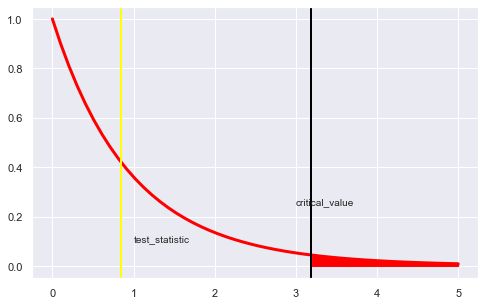

In [421]:
plt.figure(figsize= (8,5))
plt.plot(x7, stats.f.pdf(x7,2,47), color='red', linewidth=3)
plt.axvline(x= 0.85, linewidth=2, color='yellow' )#we draw the test_statistic value
plt.axvline(x= 3.19, linewidth=2, color='black' )# we draw the critical value
plt.text(x=1,y=0.1, s='test_statistic')#we add text on the plot with names for the lines
plt.text(x=3,y=0.25, s='critical_value')#we add text on the plot with names for the lines
plt.fill_between(x8, stats.f.pdf(x8,2,47),color='red')
plt.show()



## Conclusion and Business Recommendations

The 'E-news Express' is trying to expand their business by increasing the number of subscribers. In order to do so, and A/B marketing analyst is being carried out by comparing the user's behavior when presented with two different landing pages: the newly designed one and the old one implemented for some time.

A priori, by looking the data and after doing some descriptive data analysis, we can assume that the new landing page has features that seem to be more attractive for the visitors. We needed to confirm those assumptions by carry out an inferential analysis, by using different hypothesis testing methods.

The Descriptive data analysis provided us with some initial valuable insights:

•	The overall time spent on both landing pages are about 5.30 minutes, but the standard deviation gave us the impression of some dispersion in the data, in other words, the time spent on the landing pages could vary significantly among users.

•	Both landing pages where available in French, Spanish and English and the randomly selected samples included equal proportions of language users: French speakers, English speakers, and Spanish Speakers.

•	The control group has only visited the old landing page, the treatment group was only using the newly designed landing page. In both groups there were equal number of users (sample size was the same for both groups).

•	Users that eventually became subscribers tended to spend longer times navigating the landing page for both groups, control and treatment.

•	When analyzing the data according to the preferred language, we can see that the users that spent the most time on the old landing page were the Spanish speaker, followed by English and French. On the contrary, the outcome is different for the new landing page, the English speakers are the ones that spent the most time on the web, followed by the French ones and in last position the Spanish ones.

•	In regards with the converted group (users that decided to subscribe eventually), when divided by language preferred, we found out that the users that subscribed the most were the English speakers, followed by Spanish speakers and in last position the French ones. if we do further research, we can see also the ones most attracted by the new landing page seem to be the French and the Spanish users, which mostly subscribed after enjoying the new page. For the English speakers, the proportion among two landing pages are not so different, even though the English ones are the ones with a total higher rate of subscriptions.

In order to check if we can infer the users’ behavior from the samples group to the population, we have carried out several hypothesis tests.

•	We tested if the users spend more time on the new landing page than on the old one. To test this hypothesis, we used a one-tailed t-test for two independent samples for equality of means with unequal standard deviation. The result of the test shows that in average, users spend more time on the new landing page when compared with the old one, maybe the new design is more attractive for most of the visitors.

•	We tested if the proportions of users who visits each landing page and get converted are greater for the new landing page than for the older page. After applying a one-tailed z-test for two population proportions, we can conclude that the new landing page was generating a greater number of new subscribers.

•	We tested if the rate of users that become new subscribers and their language preferred are related. To test if the language and the new subscribers where related we performed a Chi_square test for independence. The result for the test was clear, there is not association between the two of them; so, the language and the decision of becoming a member after using any of the landing pages are independent. The language used does not affect the decision of subscribing.

•	We analyzed if the time spend on the new landing page depends on the language used: English, Spanish, and French. After carrying on a one-way ANOVA test, we can conclude that the overall time spend on any landing page is the same for the three language users. So, we did not find any significant differences among groups.

#### Business Recommendations.
The newly designed landing page is bringing new subscribers to 'E-news Express' so it can be a good choice for the company to increase their sales. On the other hand, it is unclear the reason why the users prefer the new landing page, maybe the new design is more appealing or maybe there are some other factors or features we would need to identify. Some additional research should be done in order to find out what is attracting new member to 'E-news Express' website.
After completing an extensive descriptive data analysis followed by some inferential testing, we can conclude that changing the current landing page for the new one could generate a higher number of members for 'E-news Express', that will translate into will lead to higher sales and eventually, a business expansion.
